In [74]:
# Jupyter notebook specific 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

# Needed for lab!
import numpy as np # Standard computational library for math, probability, and linear algebra
import matplotlib.pyplot as plt # plotting 

In [75]:
Image(url = "https://s-media-cache-ak0.pinimg.com/736x/17/8c/bd/178cbd337399c89c20ded27b4da6c2d0.jpg")

# CS-237 Lab __ 
- What this lab covers:
    - Basic introduction to probability distributions. 
    - Basic introduction to Monte Carlo Simulation.
    - Basic introduction to conditional probability. 
    - Basic introduction to computational tools in probability (using python!)

In [130]:
# Monte Hall game
# TO be used as an asignment for CS-237
# @Author: Kai Bernardini (The TF)
# Due Date: TBD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import seed, randint, uniform
from collections import Counter

# Problem 2
Read and understand the function $\texttt{dieRoll()}$, that estimates the PMF of a random variable $Y$ , where
$Y$ represents the number that comes up when you roll a fair die. 

In [5]:
# help(randint) # uncomment to understand the function

In [104]:
def dieRoll(n_trials = 10000):
    """
    - Perform the trials
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument determins the shape of the result. In this case, we only need
    - a one dimensional array ( a list)
    """
    trials_and_results = randint(1,7,(n_trials))
    return trials_and_results

example_trials = dieRoll()

[0.1575, 0.1624, 0.1713, 0.1697, 0.168, 0.1711] 1.0


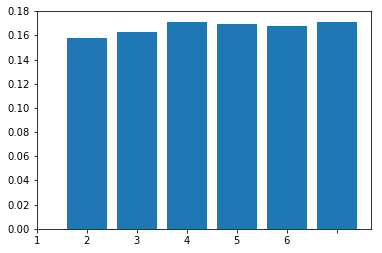

In [109]:
def single_die_hist(results):
    """
    - Estimates the probability mass function (PMF) for the outcome of rolling a single, fair die.
    @param: results -a numpy array indexed by trial number starting at trial 0 and ending at trial len(results)-1
    - plots the mpirical estimate of the PMF
    """
    n_trials = len(results)
    # Counter is a useful method for summarizing counts in a list 
    sumary = Counter(results)
    possible_rolls = [i for i in range(1,7)]
    fin = [ sumary[i]/n_trials for i in possible_rolls]
    print(fin, sum(fin))
    plt.bar(possible_rolls, fin )
    plt.xticks(range(7), possible_rolls)
    plt.show()
    
single_die_hist(example_trials)

In [96]:
1/6


0.16666666666666666

In [101]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        array

[ 0.1575  0.1624  0.1713  0.1697  0.168   0.1711]


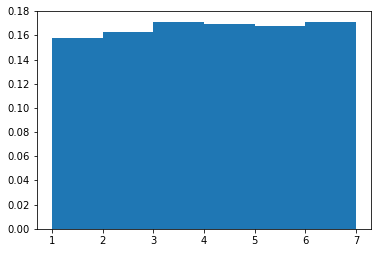

In [175]:
def alt_single_die_hist(results):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # I don't like doing it this way, because I find the histogram function 
    # counter intuitive with the way it specifies the number of bins. 
    # For a problem where you know the indicies, you can get away without using it. 
    # However, sometimes you can get lucky and just pick 'auto' 
    # The way you would get thi
    n,bins, patches = ax.hist(results,bins=range(1,8), normed = True )
    print(n)
    fig.canvas.draw()
    possible_rolls = [i for i in range(1,7)]
    #plt.xticks(range(1,7), possible_rolls)
    plt.show()
alt_single_die_hist(example_trials)
    
        

In [144]:
def roll_and_add_Dice(n_dice ,n_trials = 10000):
    """
    - Perform the trials
    - randint(a,b) uniformly and randomly selects an  integer x such that a<= x < b
    - The second argument determins the shape of the result. In this case, we only need
    - a one dimensional array ( a list)
    """
    trials_and_results = randint(1,7,(n_dice, n_trials))
    acum =  np.zeros(n_trials)
    for i in range(len(trials_and_results)):
        acum += trials_and_results[i]
    return acum
    

example_multi_trial = roll_and_add_Dice(2)
example_multi_trial

array([ 3.,  4.,  6., ...,  4.,  6.,  8.])

In [152]:
max(example_multi_trial)

12.0

[0.0301, 0.0559, 0.0855, 0.1135, 0.1371, 0.1701, 0.1387, 0.1108, 0.0794, 0.052, 0.0269] 1.0


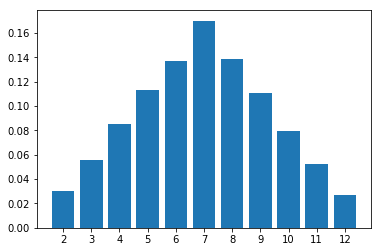

[0.0301,
 0.0559,
 0.0855,
 0.1135,
 0.1371,
 0.1701,
 0.1387,
 0.1108,
 0.0794,
 0.052,
 0.0269]

In [183]:
def diceHist(results):
    """
    - Estimates the probability mass function (PMF) for the outcome of rolling a single, fair die.
    @param: results -a numpy array indexed by trial number starting at trial 0 and ending at trial len(results)-1
    - plots the mpirical estimate of the PMF
    """
    n_trials = len(results)
    multi_die_range = range( int(min(results)), int(max(results))+1)
    # Counter is a useful method for summarizing counts in a list 
    sumary = Counter(results)
    possible_rolls = [i for i in multi_die_range]
    fin = [ sumary[i]/n_trials for i in possible_rolls]
    print(fin, sum(fin))
    plt.bar(possible_rolls, fin )
    plt.xticks(multi_die_range, possible_rolls)
    plt.show()
    return fin
diceHist(example_multi_trial)

In [188]:
sum([1/36, 2/36, 3/36, 4/36, 5/36,6/36,5/36, 4/36, 3/36,2/36,1/36])

1.0000000000000002

[2.2e-05, 0.000149, 0.000456, 0.001171, 0.002726, 0.005344, 0.009759, 0.015966, 0.025036, 0.03547, 0.048023, 0.061216, 0.073287, 0.083376, 0.09051, 0.092819, 0.090671, 0.083586, 0.073782, 0.061877, 0.047956, 0.035669, 0.02521, 0.016149, 0.009803, 0.005373, 0.002706, 0.001256, 0.000484, 0.000128, 2e-05] 0.9999999999999999


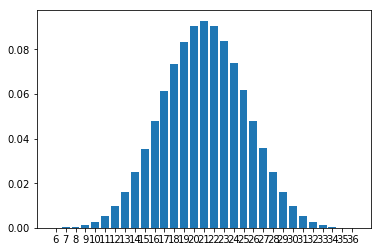

In [166]:
def simmulateDice(num_dice, n_trials = 1000000):
    sims = roll_and_add_Dice(num_dice, n_trials)
    diceHist(sims)
    return
simmulateDice(6)

In [158]:
def coinFlip(p):
    """Simple Bernoulli trial """
    return uniform(0,1) < p

In [135]:
def geometricFlip(p):
    count = 0
    while True:
        count +=1
        if uniform(0,1) < p:
            return count
    return "Something went wrong!"

geometricFlip(.5)

1

[0.2549, 0.1877, 0.1372, 0.1048, 0.0814, 0.0552, 0.0443, 0.0303, 0.0264, 0.0201, 0.0148, 0.0102, 0.0077, 0.0076, 0.0042, 0.0032, 0.0022, 0.0019, 0.0026, 0.0011, 0.0007, 0.0005, 0.0002, 0.0003, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001] 1.0


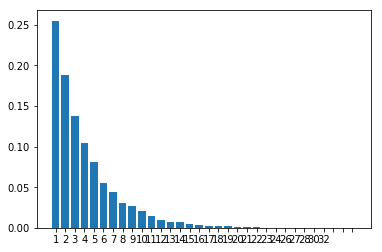

In [173]:
def geoHist(p, n_trials = 10000 ):
    results = [geometricFlip(p) for i in range(n_trials)]
    flip_range = range( int(min(results)), int(max(results))+1)
    # slight modification, since we might not see all values 
    sumary = Counter(results)
    possible_outcomes = [i for i in sorted(sumary.keys())]
    fin = [ sumary[i]/n_trials for i in possible_outcomes]
    print(fin, sum(fin))
    plt.bar(possible_outcomes, fin )
    plt.xticks(flip_range, possible_outcomes)
    plt.show()
geoHist(.25)
    

# Estimating $\pi$
- Take the square centered at the origin with corners $(0,0), (0,1), (1,0), (1,1)$
    - Notice that the area is 4
- Randomly generate numbers inside of this square. 
- Check if they are inside of the unit circle
    - Notice that the unit circle has area $\pi \cdot r^2= \pi\cdot 1^2 = \pi$
- Use these facts to get a good estimate for pi. Plot the results 

In [180]:
def estimate_pi(n_trials):
    c_in = 0
    for i in range(n_trials):
        c_in += uniform(-1,1)**2 + uniform(-1,1)**2 < 1
    return 4 * (c_in / n_trials)

estimate_pi(1000000)
        

3.141192

In [182]:
def estimate_piv2(n_trials):
    c_in = 0
    for i in range(n_trials):
        c_in += uniform(0,1)**2 + uniform(0,1)**2 < 1
    return 4 * (c_in / n_trials)

estimate_pi(5000000)

3.1418032

In [53]:
def game(auto_pick=True, num_doors = 3, swap_behavior = 'always_trade', verbose = False,
        num_open_doors = 1, r_state=None):
    if r_state != None:
        seed(r_state)
        
    assert(num_open_doors +2 <= num_doors )
    behaviors = ['always_trade', 'randomly_trade', 'never_trade']
    assert(swap_behavior in behaviors)
    x = np.zeros(num_doors)
    
    # This is the winning door. 
    ind = np.random.randint(0,num_doors)
    x[ind] = 1 # winning door!
    choice = -1 # debug
    new_door = -1
    if auto_pick:
        choice = np.random.randint(0,3)
        x[choice] += 1 # if the value of ind is 2, you win!
    if verbose == True:
        print("Choice is ", choice)
    # The host opens a door(s)! 
    opened_doors = np.zeros(num_open_doors) # no doors opened yet!
    for j in range(num_open_doors):
        door_opts = [i for i in range(len(x)) if x[i] == 0 and i != choice and x[i]!= -1]
        door_ind = door_opts[np.random.randint(len(door_opts))]
        if verbose == True:
            print("The host has oppened door number ", door_ind)
        x[door_ind] -= 1
        assert(x[door_ind] == -1)
        opened_doors[j] = door_ind
    assert(choice not in opened_doors)
    
    # With probability of 1/2, you will trade your door. 
    if swap_behavior == 'randomly_trade':
        te = np.random.uniform(0,1)
        assert(te <=1 and te>=0)
        if te >= .5:
            if verbose == True:
                print(te, "swapped!")
            
            swap_behavior = 'always_trade'
    if swap_behavior =='always_trade':
        x[choice] -= 1
        swap_door = [i for i in range(len(x)) if i != choice and i not in opened_doors]
        new_door =  swap_door[np.random.randint(len(swap_door))]
        if verbose == True:
            print("New door is ", new_door)
        x[new_door] +=1
        assert(new_door != choice)
    
    if verbose == True:
        # Some debug 
        print("Winning door is ", ind)
        
        if x[ind] == 2:
            print("Winner!")
        else:
            print("Loser!", x)
        print()
        
    return x[ind] == 2
t = 0
for i in range(100):
    game(verbose=True, swap_behavior='always_trade',  num_doors = 5, num_open_doors = 1 )

Choice is  0
The host has oppened door number  1
New door is  4
Winning door is  2
Loser! [ 0. -1.  1.  0.  1.]

Choice is  2
The host has oppened door number  3
New door is  4
Winning door is  1
Loser! [ 0.  1.  0. -1.  1.]

Choice is  0
The host has oppened door number  4
New door is  3
Winning door is  3
Winner!

Choice is  2
The host has oppened door number  1
New door is  0
Winning door is  4
Loser! [ 1. -1.  0.  0.  1.]

Choice is  0
The host has oppened door number  1
New door is  4
Winning door is  4
Winner!

Choice is  1
The host has oppened door number  2
New door is  0
Winning door is  3
Loser! [ 1.  0. -1.  1.  0.]

Choice is  1
The host has oppened door number  2
New door is  4
Winning door is  3
Loser! [ 0.  0. -1.  1.  1.]

Choice is  1
The host has oppened door number  4
New door is  0
Winning door is  1
Loser! [ 1.  1.  0.  0. -1.]

Choice is  1
The host has oppened door number  0
New door is  2
Winning door is  2
Winner!

Choice is  2
The host has oppened door number 

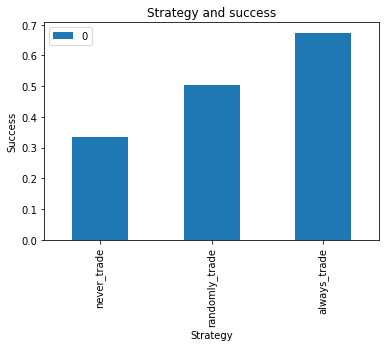

In [70]:
N = 10000
# Never trade strategy
nt = 0 
# Randomly trade with p=1/2
rt=0
#Always trade strategy
t = 0


for i in range(N):
    nt += game(verbose=False, swap_behavior='never_trade', )
    rt += game(verbose=False, swap_behavior='randomly_trade')
    t += game(verbose=False, swap_behavior='always_trade')
d = {"never_trade":nt/N,"randomly_trade":rt/N, "always_trade": t/N}
df = pd.DataFrame.from_dict(d, orient='index')
# results 
df.plot.bar()
plt.title("Strategy and success")
plt.xlabel("Strategy")
plt.ylabel("Success")
plt.show()

In [206]:
# When is factoring hard?
# Factoring example

def factor_example(): 
    c = 0
    z = randint(0,2**63)
    ind = 2
    while True:
        c +=1
        if z % ind ==0:
            return c
        ind +=1
        if c >10**6:
            print( "shit")
factor_example()

1

In [207]:
tests = [factor_example() for i in range(100)]
Counter(tests)

shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit
shit


KeyboardInterrupt: 

In [191]:
[[*,G],(*)]

SyntaxError: invalid syntax (<ipython-input-191-fc5083def672>, line 1)

In [71]:
df

,0
never_trade,0.3346
randomly_trade,0.5031
always_trade,0.6741


In [66]:
N = 10000
# Never trade strategy
nt = 0 
# Randomly trade with p=1/2
rt=0
#Always trade strategy
t = 0

for i in range(N):
    s = np.random.randint(0,1000000)
    nt += game(verbose=False, swap_behavior='never_trade',  num_doors = 5, num_open_doors = 1 , r_state = s)
    rt += game(verbose=False, swap_behavior='randomly_trade', num_doors = 5, num_open_doors = 1 ,r_state = s)
    t += game(verbose=False, swap_behavior='always_trade',  num_doors = 5, num_open_doors = 1, r_state = s )
d = {"never_trade":nt/N,"randomly_trade":rt/N, "always_trade": t/N}
df = pd.DataFrame.from_dict(d, orient='index')

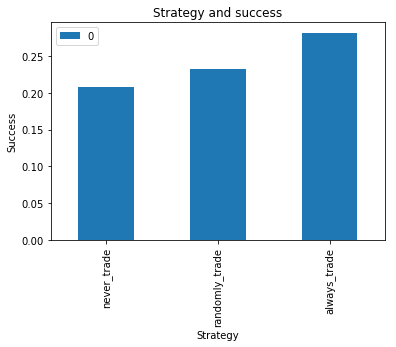

In [67]:
df.plot.bar()
plt.title("Strategy and success")
plt.xlabel("Strategy")
plt.ylabel("Success")
plt.show()

In [76]:
Image(url= "https://s-media-cache-ak0.pinimg.com/736x/0b/7f/66/0b7f66d081271a282f9dfd137f57fe22.jpg")

'0b1100001'